In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [3]:
df=pd.read_csv("autism_screening.csv")

In [4]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7.0,18 and more,?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


In [5]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [6]:
print("Number of Rows:",df.shape[0])
print("Number of Features:",df.shape[1])

Number of Rows: 704
Number of Features: 21


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [8]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [9]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [10]:
df['age'].value_counts()

age
21.0     49
20.0     46
23.0     37
22.0     37
19.0     35
24.0     34
27.0     31
18.0     31
30.0     30
26.0     28
25.0     27
29.0     27
28.0     24
31.0     21
17.0     18
32.0     18
35.0     17
37.0     17
33.0     16
40.0     16
42.0     15
36.0     13
38.0     12
34.0     12
43.0     11
44.0     10
47.0      8
39.0      7
53.0      6
55.0      6
46.0      6
50.0      5
52.0      5
45.0      4
48.0      4
49.0      3
41.0      3
58.0      2
54.0      2
56.0      2
61.0      2
59.0      1
64.0      1
60.0      1
383.0     1
51.0      1
Name: count, dtype: int64

<Axes: ylabel='age'>

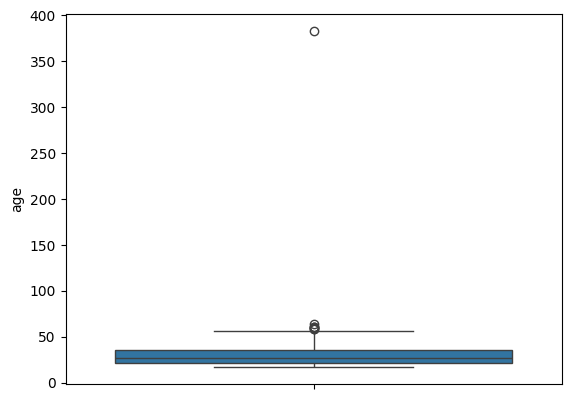

In [11]:
# boxplot to check for outliers
sns.boxplot(df['age'])

In [12]:
#dropping the outliers
df = df.drop(df[df['age'] == 383].index)

In [13]:
df['age'].value_counts()


age
21.0    49
20.0    46
23.0    37
22.0    37
19.0    35
24.0    34
18.0    31
27.0    31
30.0    30
26.0    28
29.0    27
25.0    27
28.0    24
31.0    21
32.0    18
17.0    18
35.0    17
37.0    17
33.0    16
40.0    16
42.0    15
36.0    13
34.0    12
38.0    12
43.0    11
44.0    10
47.0     8
39.0     7
53.0     6
55.0     6
46.0     6
50.0     5
52.0     5
45.0     4
48.0     4
49.0     3
41.0     3
56.0     2
61.0     2
54.0     2
58.0     2
60.0     1
59.0     1
64.0     1
51.0     1
Name: count, dtype: int64

<Axes: ylabel='age'>

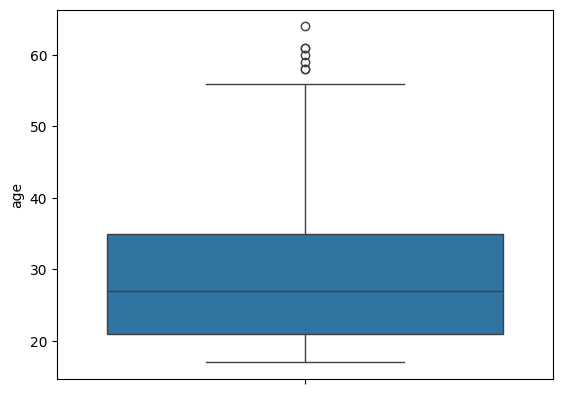

In [14]:
sns.boxplot(df['age'])

In [15]:
df['age'].isnull().sum()

2

In [16]:
df['age'] = df['age'].fillna(round(df['age'].mean()))

Exploring Categorical Features

In [17]:
df['gender'].value_counts()

gender
m    367
f    336
Name: count, dtype: int64

In [18]:
df['ethnicity'].value_counts()

ethnicity
White-European     233
Asian              123
?                   95
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            11
Turkish              6
others               1
Name: count, dtype: int64

In [19]:
df['ethnicity'] = df['ethnicity'].replace('?', 'others')

In [20]:
df['ethnicity'].value_counts()

ethnicity
White-European     233
Asian              123
others              96
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            11
Turkish              6
Name: count, dtype: int64

In [21]:
df['jundice'].value_counts()

jundice
no     634
yes     69
Name: count, dtype: int64

In [22]:
df['austim'].value_counts()

austim
no     612
yes     91
Name: count, dtype: int64

In [23]:
df['contry_of_res'].value_counts()

contry_of_res
United States           113
United Arab Emirates     82
India                    81
New Zealand              80
United Kingdom           77
                       ... 
China                     1
Chile                     1
Lebanon                   1
Burundi                   1
Cyprus                    1
Name: count, Length: 67, dtype: int64

In [24]:
df['used_app_before'].value_counts()

used_app_before
no     691
yes     12
Name: count, dtype: int64

In [25]:
df['age_desc'].value_counts()

age_desc
18 and more    703
Name: count, dtype: int64

In [26]:
df['relation'].value_counts()

relation
Self                        521
?                            95
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: count, dtype: int64

In [27]:
df['relation'] = df['relation'].replace('?', 'Others')

In [28]:
df['relation'].value_counts()

relation
Self                        521
Others                      100
Parent                       50
Relative                     28
Health care professional      4
Name: count, dtype: int64

In [29]:
df['Class/ASD'].value_counts()

Class/ASD
NO     514
YES    189
Name: count, dtype: int64

Text(0, 0.5, 'Count')

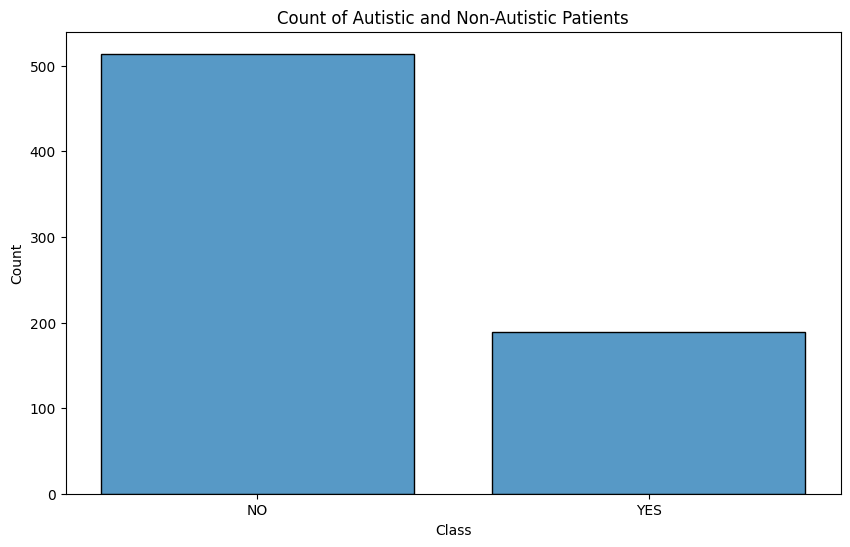

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Class/ASD'],  shrink=0.8)

# Add title and labels
plt.title('Count of Autistic and Non-Autistic Patients')
plt.xlabel('Class')
plt.ylabel('Count')

In [31]:
average_age = df.groupby('Class/ASD', as_index=False).agg({'age': 'mean'})

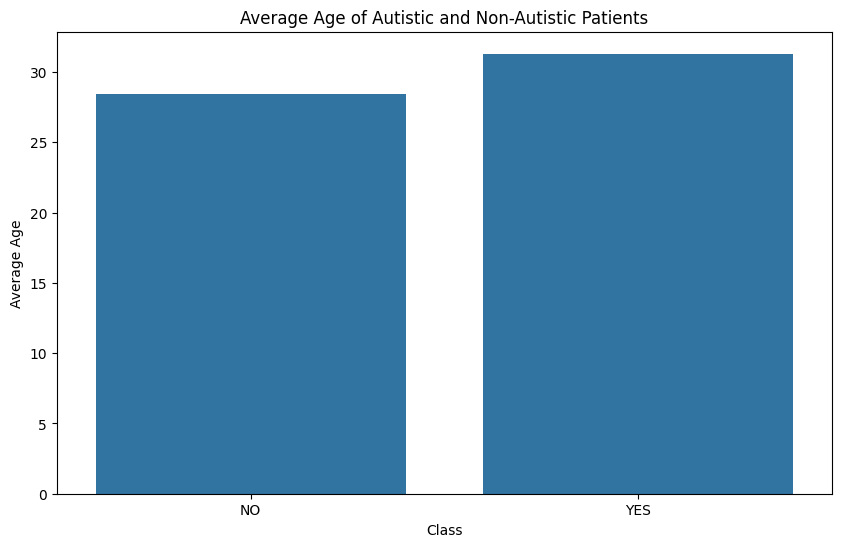

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Class/ASD', y='age', data=average_age)

# Add title and labels
plt.title('Average Age of Autistic and Non-Autistic Patients')
plt.xlabel('Class')
plt.ylabel('Average Age')

# Show the plot
plt.show()

Text(0, 0.5, 'Count')

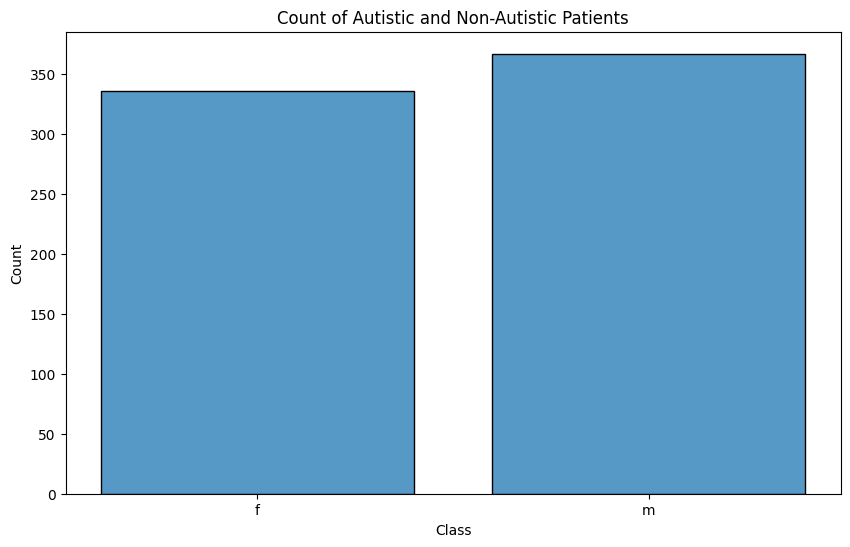

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['gender'],  shrink=0.8)

# Add title and labels
plt.title('Count of Autistic and Non-Autistic Patients')
plt.xlabel('Class')
plt.ylabel('Count')

In [34]:
count_data = df.groupby(['Class/ASD', 'gender']).size().reset_index(name='count')



Text(0, 0.5, 'Count')

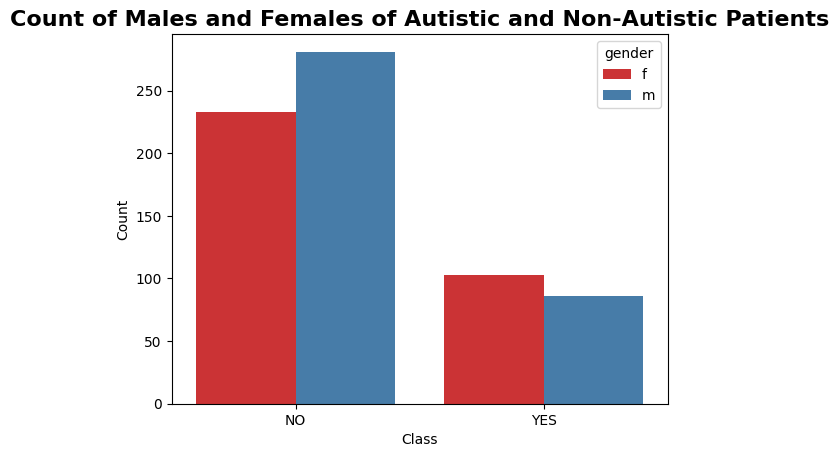

In [35]:
sns.barplot(x='Class/ASD', y='count', hue='gender', data=count_data, palette='Set1')

plt.title('Count of Males and Females of Autistic and Non-Autistic Patients', fontsize=16, fontweight='bold', loc='center')
plt.xlabel('Class')
plt.ylabel('Count')

In [36]:
filtered_df = df[df['Class/ASD'] == 'YES']


C:\Users\Admin\AppData\Local\Temp\ipykernel_6688\107046469.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(filtered_df['contry_of_res'], discrete=True, palette='viridis')


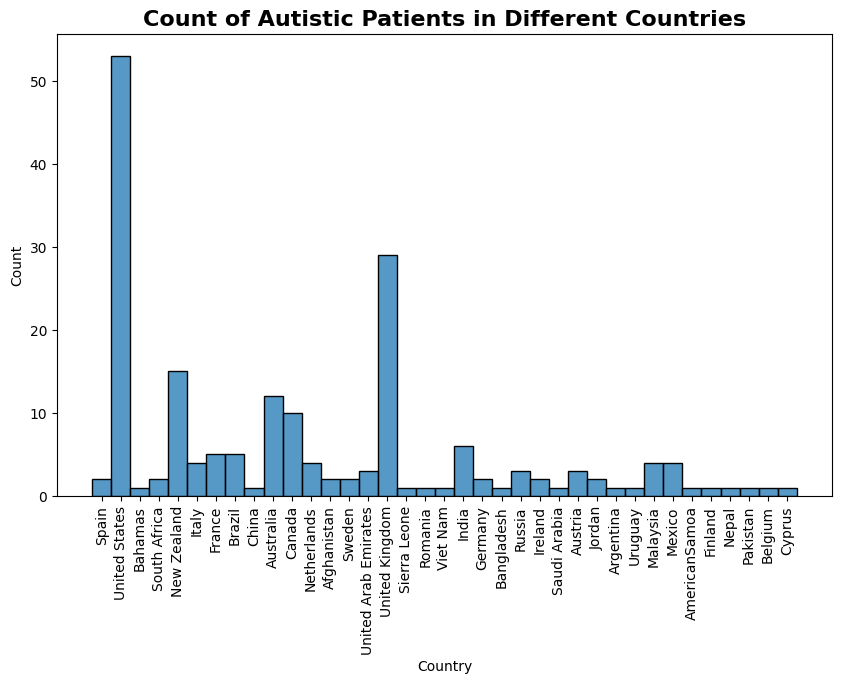

In [37]:

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['contry_of_res'], discrete=True, palette='viridis')


plt.title('Count of Autistic Patients in Different Countries', fontsize=16, fontweight='bold', loc='center')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)


plt.show()

In [38]:
count_data = df.groupby(['Class/ASD', 'age_desc']).size().reset_index(name='count')

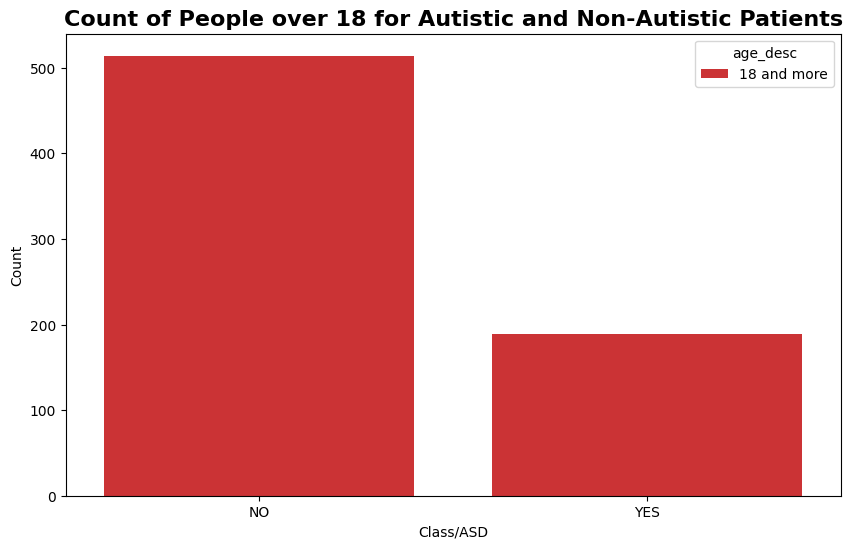

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Class/ASD', y='count', hue='age_desc', data=count_data, palette='Set1')

# Add title and labels
plt.title('Count of People over 18 for Autistic and Non-Autistic Patients', fontsize=16, fontweight='bold', loc='center')
plt.xlabel('Class/ASD')
plt.ylabel('Count')

# Show the plot
plt.show()

In [40]:
count_data = df.groupby(['Class/ASD', 'jundice']).size().reset_index(name='count')

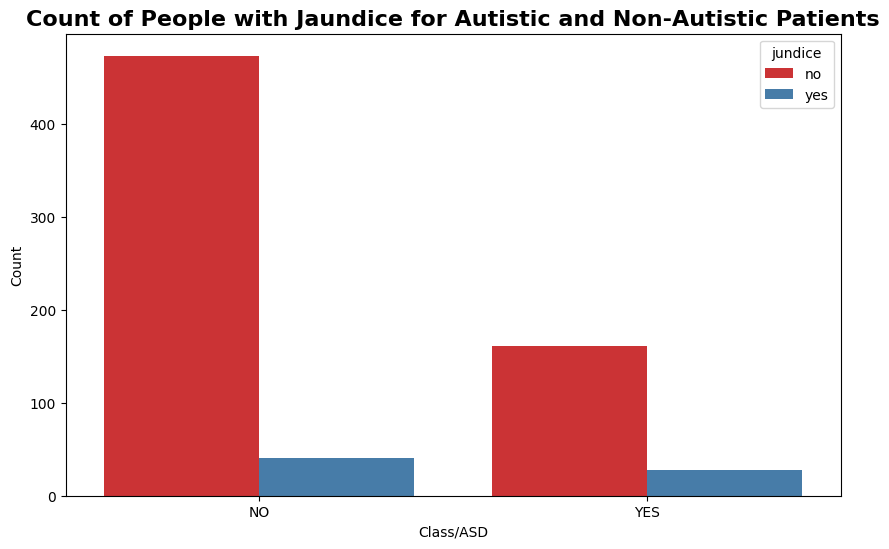

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Class/ASD', y='count', hue='jundice', data=count_data, palette='Set1')

# Add title and labels
plt.title('Count of People with Jaundice for Autistic and Non-Autistic Patients', fontsize=16, fontweight='bold', loc='center')
plt.xlabel('Class/ASD')
plt.ylabel('Count')

# Show the plot
plt.show()

In [42]:
df = df.drop('age_desc', axis=1)

In [43]:
X = df.drop('Class/ASD', axis=1)
y = df['Class/ASD']

In [44]:
cols_to_encode = ['gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']

# Apply label encoding to X
label_encoder_X = LabelEncoder()
for col in cols_to_encode:
    X[col] = label_encoder_X.fit_transform(X[col])

# Apply label encoding to y
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

In [45]:
X.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation
0,1,1,1,1,0,0,1,1,0,0,26.0,0,9,0,0,64,0,6.0,4
1,1,1,0,1,0,0,0,1,0,1,24.0,1,3,0,1,13,0,5.0,4
2,1,1,0,1,1,0,1,1,1,1,27.0,1,3,1,1,56,0,8.0,2
3,1,1,0,1,0,0,1,1,0,1,35.0,0,9,0,1,64,0,6.0,4
4,1,0,0,0,0,0,0,1,0,0,40.0,0,10,0,0,22,0,2.0,1
5,1,1,1,1,1,0,1,1,1,1,36.0,1,5,1,0,64,0,9.0,4
6,0,1,0,0,0,0,0,1,0,0,17.0,0,1,0,0,64,0,2.0,4
7,1,1,1,1,0,0,0,0,1,0,64.0,1,9,0,0,43,0,5.0,2
8,1,1,0,0,1,0,0,1,1,1,29.0,1,9,0,0,64,0,6.0,4
9,1,1,1,1,0,1,1,1,1,0,17.0,1,0,1,1,9,0,8.0,0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
model = Sequential([
        Dense(10, activation='relu', input_dim=19),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
])

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297 (1.16 KB)

 Trainable params: 297 (1.16 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.25)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7499 - loss: 1.3679 - val_accuracy: 0.7518 - val_loss: 0.8339
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6177 - loss: 0.9644 - val_accuracy: 0.5390 - val_loss: 0.7885
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5536 - loss: 0.7615 - val_accuracy: 0.6170 - val_loss: 0.6702
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6432 - loss: 0.7149 - val_accuracy: 0.7660 - val_loss: 0.5966
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7183 - loss: 0.6805 - val_accuracy: 0.7872 - val_loss: 0.5776
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7269 - loss: 0.6463 - val_accuracy: 0.7801 - val_loss: 0.5771
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7356 - loss: 0.6129 - val_accuracy: 0.7518 - val_loss: 0.5896
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7221 - loss: 0.6304 - val_accuracy: 0.7660 - 

In [51]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

In [52]:
Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

<Figure size 2000x800 with 0 Axes>

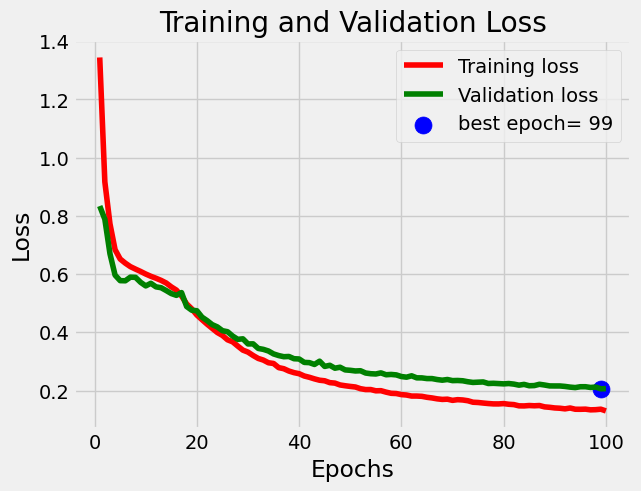

In [54]:
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

In [58]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [59]:
y_pred = (y_pred > 0.5)

In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[86,  6],
       [ 7, 42]], dtype=int64)

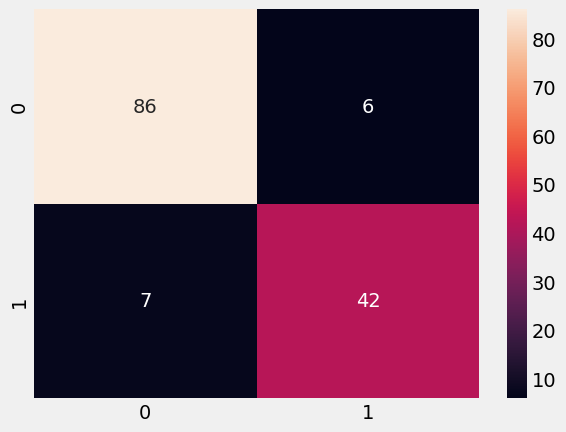

In [61]:
sns.heatmap(cm, annot=True)
plt.show()